## Exercise 1: Data Loading, Inspection and Visualization
For this exercise, we use NBA data `nba_stats.csv` provided.


In [4]:
# Import requiered packages
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Load the dataset.

In [6]:
df = pd.read_csv('nba_stats.csv', low_memory=False)

#### 2. Get an overview of the dataset

In [11]:
df.head()

,Year,Player,Pos,Age,Tm,MP,FT,TRB,AST,STL,BLK,TOV,PF,PTS
0,2017,Ivica Zubac,C,19,LAL,609,32,159,30,14,33,30,66,284
1,2017,Gerald Green,SF,31,BOS,538,33,85,33,9,7,25,48,262
2,2017,Danny Green,SG,29,SAS,1807,27,224,124,71,58,76,120,497
3,2017,Jerian Grant,PG,24,CHI,1028,65,111,120,47,8,44,93,370
4,2017,Jerami Grant,SF,22,OKC,1490,86,199,46,33,75,41,144,421


In [10]:
df.tail()

,Year,Player,Pos,Age,Tm,MP,FT,TRB,AST,STL,BLK,TOV,PF,PTS
19640,1978,Eddie Owens,SF,24,BUF,63,3,10,5,1,0,3,9,21
19641,1978,Tom Owens,C,28,POR,1714,206,541,160,33,37,152,263,832
19642,1978,Joe Pace,C,24,WSB,438,57,134,23,12,21,44,86,191
19643,1978,Robert Parish*,C,24,GSW,1969,165,680,95,79,123,201,291,1025
19644,1978,Willie Norwood,SF,30,DET,260,20,54,14,13,3,17,45,88


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19645 entries, 0 to 19644
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    19645 non-null  int64 
 1   Player  19645 non-null  object
 2   Pos     19645 non-null  object
 3   Age     19645 non-null  int64 
 4   Tm      19645 non-null  object
 5   MP      19645 non-null  int64 
 6   FT      19645 non-null  int64 
 7   TRB     19645 non-null  int64 
 8   AST     19645 non-null  int64 
 9   STL     19645 non-null  int64 
 10  BLK     19645 non-null  int64 
 11  TOV     19645 non-null  int64 
 12  PF      19645 non-null  int64 
 13  PTS     19645 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


In [13]:
df.describe()

,Year,Age,MP,FT,TRB,AST,STL,BLK,TOV,PF,PTS
count,19645.000000,19645.000000,19645.000000,19645.000000,19645.000000,19645.000000,19645.000000,19645.000000,19645.000000,19645.000000,19645.000000
mean,1999.475897,26.803614,1168.571596,94.487910,205.793739,111.669738,39.252380,24.340799,73.939832,109.474116,490.462662
std,11.263847,3.973302,925.141538,107.579824,204.223512,137.530665,38.159662,36.649355,67.713803,81.652565,481.407801
min,1978.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1990.000000,24.000000,317.000000,16.000000,47.000000,17.000000,9.000000,3.000000,18.000000,36.000000,96.000000
50%,2000.000000,26.000000,995.000000,57.000000,146.000000,63.000000,29.000000,11.000000,55.000000,100.000000,342.000000
75%,2009.000000,29.000000,1906.000000,136.000000,297.000000,154.000000,59.000000,29.000000,112.000000,171.000000,757.000000
max,2017.000000,44.000000,3638.000000,833.000000,1530.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,3041.000000


###### 1. Find the average age of the players for the year 2017.

In [30]:
df[df["Year"] == 2017]["Age"].mean()

26.40672268907563

###### 2. Plot the total number of points (`PTS`) per year since 2000

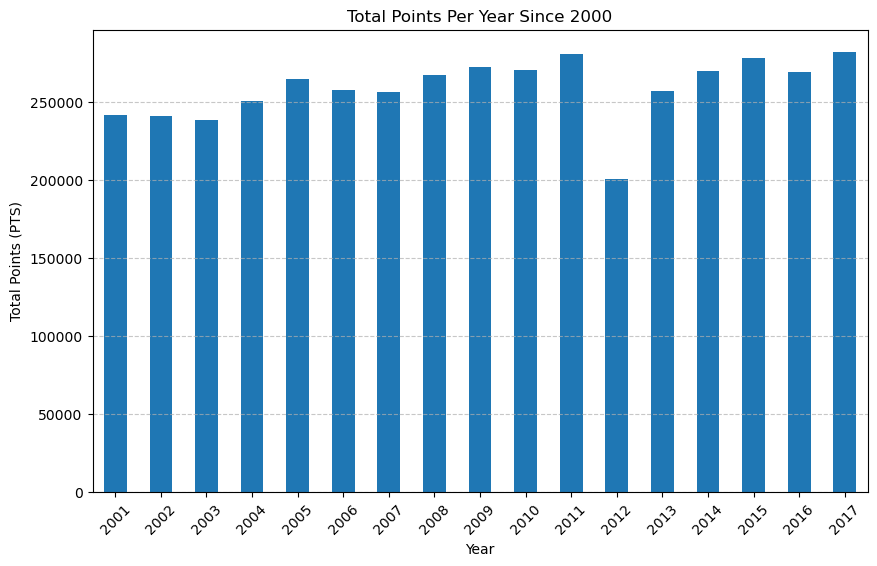

In [21]:
filtered_df = df[df["Year"] > 2000]
points_per_year = filtered_df.groupby("Year")["PTS"].sum()
points_per_year.plot(kind="bar", title="Total Points Per Year Since 2000", figsize=(10, 6))

plt.xlabel("Year")
plt.ylabel("Total Points (PTS)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

###### 3. Plot the number of players per year since 2010. What is the year with the most players?

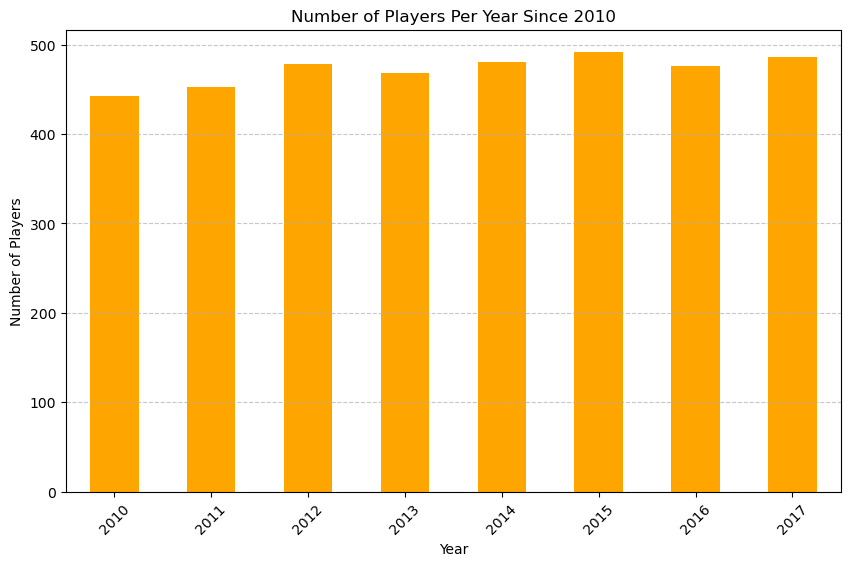

The year with the most players is 2015 with 492 players.


In [28]:
filtered_df = df[df["Year"] >= 2010]

players_per_year = filtered_df.groupby("Year")["Player"].nunique()

players_per_year.plot(kind="bar", title="Number of Players Per Year Since 2010", figsize=(10, 6), color="orange")

plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

most_players_year = players_per_year.idxmax()
most_players_count = players_per_year.max()
print(f"The year with the most players is {most_players_year} with {most_players_count} players.")
